In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

import dataset for train and test

In [3]:
dataset_train = pd.read_csv('dataset/Google_Stock_Price_Train.csv', 
                            parse_dates=['Date'], index_col="Date")

dataset_test = pd.read_csv('dataset/Google_Stock_Price_Test.csv', 
                            parse_dates=['Date'], index_col="Date")

print(dataset_train.head())
print(dataset_test.head())

              Open    High     Low   Close      Volume
Date                                                  
2012-01-03  325.25  332.83  324.97  663.59   7,380,500
2012-01-04  331.27  333.87  329.08  666.45   5,749,400
2012-01-05  329.83  330.75  326.89  657.21   6,590,300
2012-01-06  328.34  328.77  323.68  648.24   5,405,900
2012-01-09  322.04  322.29  309.46  620.76  11,688,800
              Open    High     Low   Close     Volume
Date                                                 
2017-01-03  778.81  789.63  775.80  786.14  1,657,300
2017-01-04  788.36  791.34  783.16  786.90  1,073,000
2017-01-05  786.08  794.48  785.02  794.02  1,335,200
2017-01-06  795.26  807.90  792.20  806.15  1,640,200
2017-01-09  806.40  809.97  802.83  806.65  1,272,400


In [4]:
# Check for missing values and data types
print("Training Data Info:")
print(dataset_train.info())
print("\nTesting Data Info:")
print(dataset_test.info())

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   object 
 4   Volume  1258 non-null   object 
dtypes: float64(3), object(2)
memory usage: 59.0+ KB
None

Testing Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-03 to 2017-01-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
 1   High    20 non-null     float64
 2   Low     20 non-null     float64
 3   Close   20 non-null     float64
 4   Volume  20 non-null     object 
dtypes: float64(4), object(1)
memory usage: 960.0+ bytes
None


In [5]:
# display columns
dataset_train.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [6]:
# display test columns
dataset_test.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [7]:
# drop unnecessary columns
dataset_train.drop(['Open', 'High', 'Low', 'Volume'], axis=1, inplace=True)
dataset_test.drop(['Open', 'High', 'Low', 'Volume'], axis=1, inplace=True)

print(dataset_train.head())
print(dataset_test.head())

             Close
Date              
2012-01-03  663.59
2012-01-04  666.45
2012-01-05  657.21
2012-01-06  648.24
2012-01-09  620.76
             Close
Date              
2017-01-03  786.14
2017-01-04  786.90
2017-01-05  794.02
2017-01-06  806.15
2017-01-09  806.65


In [8]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1258 non-null   object
dtypes: object(1)
memory usage: 19.7+ KB


In [9]:
dataset_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-03 to 2017-01-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   20 non-null     float64
dtypes: float64(1)
memory usage: 320.0 bytes


In [10]:
# convert Close column to float
dataset_train['Close'] = dataset_train['Close'].str.replace(',', '').astype(float)
# test dataset close column is already in float
# dataset_test['Close'] = dataset_test['Close'].str.replace(',', '').astype(float)

print(dataset_train.info())
print(dataset_test.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1258 non-null   float64
dtypes: float64(1)
memory usage: 19.7 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-03 to 2017-01-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   20 non-null     float64
dtypes: float64(1)
memory usage: 320.0 bytes
None


In [11]:
print(dataset_train.describe())
print("length of train data : ", len(dataset_train))
print("length of test data : ", len(dataset_test))


             Close
count  1258.000000
mean    712.669666
std     164.752591
min     491.200000
25%     576.740000
50%     695.675000
75%     782.105000
max    1216.830000
length of train data :  1258
length of test data :  20


In [12]:
# scale data
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0, 1))

dataset_train_scaled = sc.fit_transform(dataset_train)
dataset_test_scaled = sc.transform(dataset_test)

print(dataset_train_scaled.shape)
print(dataset_test_scaled.shape)

(1258, 1)
(20, 1)


In [13]:
# timeseries data

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

length = 12
batch_size = 1

train_generator = TimeseriesGenerator(dataset_train_scaled, 
                                      dataset_train_scaled, 
                                      length=length, 
                                      batch_size=batch_size)
print(train_generator[0][0].shape)
print(len(train_generator))



(1, 12, 1)
1246


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Dropout

In [15]:
dataset_train.shape
n_features = dataset_train.shape[1]
n_features

1

In [66]:
# RNN with relu activation
model = Sequential()

model.add(SimpleRNN(units=128, 
                    activation='tanh', 
                    return_sequences=True, 
                    input_shape=(length, n_features)))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=64, 
                    activation='tanh', 
                    return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=32, 
                    activation='tanh', 
                    return_sequences=False))
# model.add(SimpleRNN(units=16, 
#                     activation='tanh', 
#                     return_sequences=True))
# model.add(Dropout(0.2))
# model.add(SimpleRNN(units=8, 
#                     activation='tanh'))
model.add(Dropout(0.2))
# model.add(Dense(64, activation="tanh"))
# model.add(Dense(32, activation="tanh"))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

c:\Users\princ\miniconda3\envs\stock_prediction\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_10 (SimpleRNN)       │ (None, 12, 128)        │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 12, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_11 (SimpleRNN)       │ (None, 12, 64)         │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 12, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_12 (SimpleRNN)       │ (None, 32)             │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,129 (125.50 KB)

 Trainable params: 32,129 (125.50 KB)

 Non-trainable params: 0 (0.00 B)

In [67]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
validation_generator = TimeseriesGenerator(dataset_test_scaled, 
                                           dataset_test_scaled, 
                                           length=length,
                                           batch_size=batch_size)
model.fit(train_generator, epochs=3, validation_data=validation_generator, callbacks=[early_stopping])

Epoch 1/3
1243/1246 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4144

c:\Users\princ\miniconda3\envs\stock_prediction\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1246/1246 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - loss: 0.4142 - val_loss: 0.0114
Epoch 2/3
1246/1246 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.1139 - val_loss: 0.0068
Epoch 3/3
1246/1246 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0154 - val_loss: 0.0076


<Axes: >

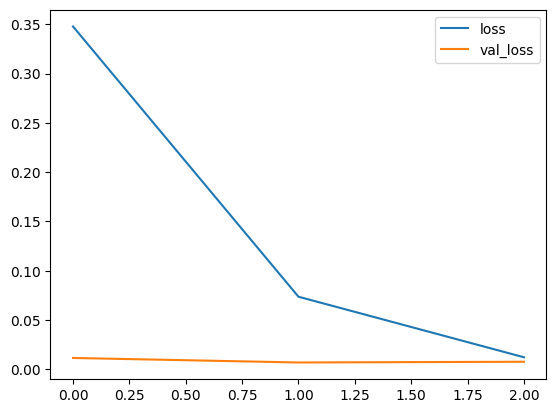

In [68]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [99]:
# define a function to evaluate model
from sklearn.metrics import mean_absolute_error, mean_squared_error

def eval_metrics(actual, pred):
    mae = mean_absolute_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mse = mean_squared_error(actual, pred)
    return print("MAE:", mae, "\nMSE:",mse, "\nRMSE:",rmse)


In [ ]:

predictions_scaled = []

first_eval_batch = dataset_train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    current_pred = model.predict(current_batch)
    predictions_scaled.append(current_pred[0]) 
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


In [85]:
current_pred

array([[0.47164592]], dtype=float32)

In [86]:
current_batch

array([[[0.44174275],
        [0.4406279 ],
        [0.44069847],
        [0.44207802],
        [0.44429308],
        [0.44731435],
        [0.45096552],
        [0.45511237],
        [0.45943603],
        [0.46367189],
        [0.46778661],
        [0.47164592]]])

In [87]:
predictions_scaled

[array([0.44174275], dtype=float32),
 array([0.4406279], dtype=float32),
 array([0.44069847], dtype=float32),
 array([0.44207802], dtype=float32),
 array([0.44429308], dtype=float32),
 array([0.44731435], dtype=float32),
 array([0.45096552], dtype=float32),
 array([0.45511237], dtype=float32),
 array([0.45943603], dtype=float32),
 array([0.4636719], dtype=float32),
 array([0.4677866], dtype=float32),
 array([0.47164592], dtype=float32)]

In [88]:
eval_metrics(dataset_test_scaled[:length], predictions_scaled)


mae: 0.024296514525433133 
mse: 0.0007048648589315521 
rmse: 0.026549291119190962


In [89]:
predictions = sc.inverse_transform(predictions_scaled)

In [90]:
compare = dataset_train[:12]
compare['Predictions_tanh'] = predictions
compare

C:\Users\princ\AppData\Local\Temp\ipykernel_19788\1031614827.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compare['Predictions_tanh'] = predictions


,Close,Predictions_tanh
Date,,
2012-01-03,663.59,811.741790
2012-01-04,666.45,810.932825
2012-01-05,657.21,810.984034
2012-01-06,648.24,811.985077
2012-01-09,620.76,813.592389
2012-01-10,621.43,815.784713
2012-01-11,624.25,818.434113
2012-01-12,627.92,821.443187
2012-01-13,623.28,824.580566


<Axes: xlabel='Date'>

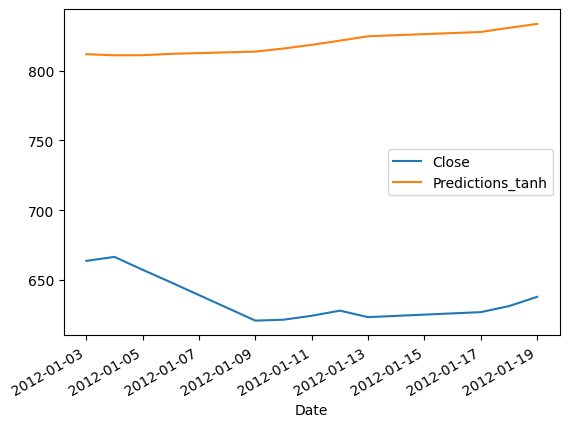

In [91]:
compare.plot()

In [92]:
eval_metrics(compare.Close, compare.Predictions_tanh)


mae: 181.85194650175666 
mse: 33524.317352661805 
rmse: 183.09647007154945


In [93]:
# with lstm

model = Sequential()
model.add(LSTM(64, activation = 'relu', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(32, activation = 'relu', return_sequences=True))
model.add(LSTM(16, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')
model.summary()

c:\Users\princ\miniconda3\envs\stock_prediction\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_21 (LSTM)                  │ (None, 12, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_22 (LSTM)                  │ (None, 12, 32)         │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_23 (LSTM)                  │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,465 (126.82 KB)

 Trainable params: 32,465 (126.82 KB)

 Non-trainable params: 0 (0.00 B)

In [94]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)
model.fit(train_generator,
            epochs = 30,
            validation_data = validation_generator,
            callbacks = [early_stop])

Epoch 1/30
1246/1246 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - loss: 0.0295 - val_loss: 0.0013
Epoch 2/30
1246/1246 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 0.0063 - val_loss: 0.0011
Epoch 3/30
1246/1246 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - loss: 0.0057 - val_loss: 7.2374e-04
Epoch 4/30
1246/1246 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 0.0038 - val_loss: 8.5509e-04
Epoch 5/30
1246/1246 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - loss: 0.0043 - val_loss: 7.7011e-04
Epoch 6/30
1246/1246 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 0.0053 - val_loss: 6.4508e-04
Epoch 7/30
1246/1246 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - loss: 0.0016 - val_loss: 7.0113e-04
Epoch 8/30
1246/1246 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 7.2380e-04 - val_loss: 5.3636e-04
Epoch 9/30
1246/1246 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - loss: 0.0014 - val_loss: 5.7452e-04
Epoch 10/30
1246/1246 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 6.7035e-04 - val_loss: 7.9994e-04
Epoch 11/30
1246/1246 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - los

<Axes: >

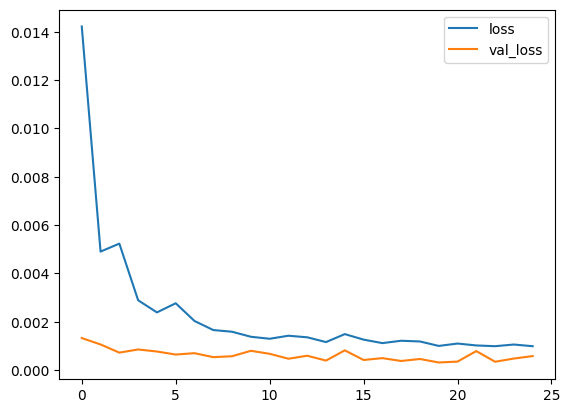

In [95]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [96]:
# evaluation of test dataset
predictions_scaled = []

first_eval_batch = dataset_train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    current_pred = model.predict(current_batch)
    predictions_scaled.append(current_pred[0]) 
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)


predictions = sc.inverse_transform(predictions_scaled)
compare['Predictions_relu'] = predictions
compare

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 659ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


C:\Users\princ\AppData\Local\Temp\ipykernel_19788\717219573.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compare['Predictions_relu'] = predictions


,Close,Predictions_tanh,Predictions_relu
Date,,,
2012-01-03,663.59,811.741790,770.781181
2012-01-04,666.45,810.932825,767.207941
2012-01-05,657.21,810.984034,763.655614
2012-01-06,648.24,811.985077,760.059386
2012-01-09,620.76,813.592389,756.415929
2012-01-10,621.43,815.784713,752.737395
2012-01-11,624.25,818.434113,748.989227
2012-01-12,627.92,821.443187,745.182519
2012-01-13,623.28,824.580566,741.335199


<Axes: xlabel='Date'>

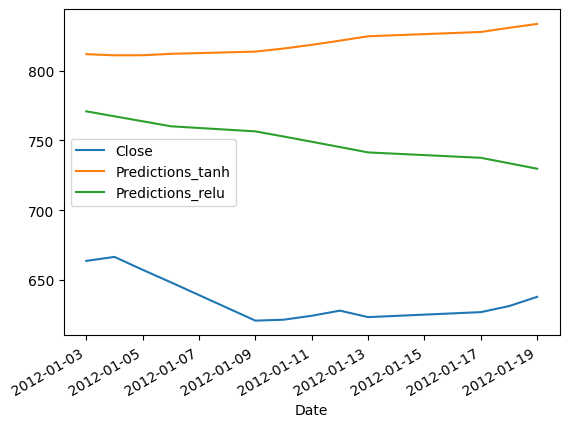

In [97]:
compare.plot()

In [98]:
eval_metrics(compare.Close, compare.Predictions_relu)


mae: 113.17042520426213 
mse: 12959.594338095281 
rmse: 113.84021406381525


In [103]:
# from the evalution, the model seems to be good

dataset = pd.concat([dataset_train, dataset_test])
dataset_sc = sc.fit_transform(dataset)
dataset.head()

generator = TimeseriesGenerator(dataset_sc, dataset_sc, length = length, batch_size = batch_size)



In [104]:
# Initialising the RNN
model = Sequential()

# Adding the first RNN layer and some Dropout regularisation
model.add(SimpleRNN(units = 50,activation='relu', return_sequences = True, input_shape = (length, n_features)))
model.add(Dropout(0.2)) 
# Adding a second RNN layer and some Dropout regularisation.
model.add(SimpleRNN(units = 50,activation='relu', return_sequences = True))
model.add(Dropout(0.2))
# Adding a third RNN layer and some Dropout regularisation. 
model.add(SimpleRNN(units = 50,activation='relu', return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth RNN layer and some Dropout regularisation.
model.add(SimpleRNN(units = 50))
model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))
# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mse')

# Fitting the RNN to the Training set
model.fit(generator, epochs = 40, batch_size = 32)

Epoch 1/40


c:\Users\princ\miniconda3\envs\stock_prediction\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\princ\miniconda3\envs\stock_prediction\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1266/1266 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - loss: 0.0237
Epoch 2/40
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - loss: 0.0089
Epoch 3/40
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - loss: 0.0074
Epoch 4/40
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - loss: 0.0070
Epoch 5/40
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 0.0047
Epoch 6/40
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 0.0073
Epoch 7/40
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - loss: 0.0048
Epoch 8/40
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 0.0048
Epoch 9/40
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 0.0037
Epoch 10/40
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - loss: 0.0040
Epoch 11/40
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - loss: 0.0035
Epoch 12/40
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 0.0046
Epoch 13/40
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - loss: 0.0038
Epoch 14/40
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - loss: 0.0048
Epoch 15/40
1266/

In [ ]:
model = Sequential()

model.add(SimpleRNN(units=128, activation="tanh", input_shape=(length, n_features)))
model.add(Dropout(0.2))  # Dropout katmanı eklendi, dropout oranı 0.2 olarak ayarlandı
model.add(Dense(64, activation="relu"))  # Aktivasyon fonksiyonu olarak "relu" kullanıldı
model.add(Dense(32, activation="tanh"))  # Aktivasyon fonksiyonu olarak "tanh" kullanıldı
model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")

model.fit(generator, epochs=30)

Epoch 1/30


c:\Users\princ\miniconda3\envs\stock_prediction\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1266/1266 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0140
Epoch 2/30
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0018
Epoch 3/30
1266/1266 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0015
Epoch 4/30
 766/1266 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0013

In [ ]:
forecast = []
first_eval_batch = dataset_train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

In [ ]:
forecast = sc.inverse_transform(forecast)
forecast

NameError: name 'forecast' is not defined

In [ ]:
dataset

In [ ]:
dataset_test.head()

In [ ]:
forecast_index = pd.date_range(start = '2014-03-27', periods = length, freq = 'MS')

In [ ]:
forecast_index

In [ ]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])

In [ ]:
forecast_df

In [ ]:
dataset_train['2014':'2015'][dataset_train['Close'] < 1200].reset_index().head(45)

In [ ]:
plt.figure(figsize = (16, 8))
plt.plot(dataset.index, dataset['Close'])
plt.plot(forecast_df.index, forecast_df['Forecast'])

In [ ]:
forecast_index = pd.date_range(start = '2017-01-03', periods = length, freq = 'MS')

In [ ]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])

In [ ]:
plt.figure(figsize = (16, 8))
plt.plot(full_data.index, full_data['Close'])
plt.plot(forecast_df.index, forecast_df['Forecast'])